In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as dd
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda:0")

In [3]:
X = dd.read_csv('train.csv', encoding="UTF-8")
X = X.drop(['PassengerId', 'Survived', 'Ticket', 'Name', 'Cabin'], axis=1)

y = dd.read_csv('train.csv', usecols=['Survived'])

In [4]:
X['Sex'] = X['Sex'].replace(['male', 'female'],[1,2])
X['Embarked'] = X['Embarked'].replace(['S', 'C', 'Q'],[1,2,3])
# X['Pclass'] = X['Pclass'].replace([2,3],[-1,0])

In [5]:
X.isnull().any() # Tell whether any row contains NaNs or not

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [6]:
X['Age'].fillna(X['Age'].mode()[0], inplace=True)  # replace NaN with average age
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)
X.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [7]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1.0
1,1,2,38.0,1,0,71.2833,2.0
2,3,2,26.0,0,0,7.9250,1.0
3,1,2,35.0,1,0,53.1000,1.0
4,3,1,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1.0
887,1,2,19.0,0,0,30.0000,1.0
888,3,2,24.0,1,2,23.4500,1.0
889,1,1,26.0,0,0,30.0000,2.0


In [8]:
# X['Age'] = (X['Age']-40)/40
# X['Fare'] = X['Fare']/512
# X

In [9]:
y = torch.Tensor(y.values)
X = torch.Tensor(X.values)

In [10]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [11]:
model = Model(7, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
torch.manual_seed(2)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1296, -0.1197,  0.3220,  0.2237,  0.0826,  0.0652,  0.0791]],
       requires_grad=True), Parameter containing:
tensor([-0.0733], requires_grad=True)]


In [13]:
epochs = 5000
losses = []
loss = 0

for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.6152137517929077
epoch: 1 loss: 0.6151852607727051
epoch: 2 loss: 0.615155816078186
epoch: 3 loss: 0.6151252388954163
epoch: 4 loss: 0.6150935292243958
epoch: 5 loss: 0.6150606274604797
epoch: 6 loss: 0.6150266528129578
epoch: 7 loss: 0.6149912476539612
epoch: 8 loss: 0.6149547696113586
epoch: 9 loss: 0.6149167418479919
epoch: 10 loss: 0.6148771643638611
epoch: 11 loss: 0.6148362159729004
epoch: 12 loss: 0.6147933006286621
epoch: 13 loss: 0.6147488951683044
epoch: 14 loss: 0.6147025227546692
epoch: 15 loss: 0.6146541833877563
epoch: 16 loss: 0.6146036386489868
epoch: 17 loss: 0.6145509481430054
epoch: 18 loss: 0.6144959926605225
epoch: 19 loss: 0.6144384741783142
epoch: 20 loss: 0.6143784523010254
epoch: 21 loss: 0.6143156290054321
epoch: 22 loss: 0.614249587059021
epoch: 23 loss: 0.6141806840896606
epoch: 24 loss: 0.6141083240509033
epoch: 25 loss: 0.6140323877334595
epoch: 26 loss: 0.6139527559280396
epoch: 27 loss: 0.6138692498207092
epoch: 28 loss: 0.61378157138824

epoch: 395 loss: 0.20987795293331146
epoch: 396 loss: 0.20979292690753937
epoch: 397 loss: 0.20970816910266876
epoch: 398 loss: 0.20962364971637726
epoch: 399 loss: 0.2095392942428589
epoch: 400 loss: 0.20945514738559723
epoch: 401 loss: 0.20937120914459229
epoch: 402 loss: 0.20928755402565002
epoch: 403 loss: 0.2092040777206421
epoch: 404 loss: 0.20912082493305206
epoch: 405 loss: 0.20903775095939636
epoch: 406 loss: 0.20895493030548096
epoch: 407 loss: 0.20887230336666107
epoch: 408 loss: 0.20878984034061432
epoch: 409 loss: 0.20870766043663025
epoch: 410 loss: 0.20862559974193573
epoch: 411 loss: 0.20854389667510986
epoch: 412 loss: 0.20846228301525116
epoch: 413 loss: 0.2083808183670044
epoch: 414 loss: 0.2082996666431427
epoch: 415 loss: 0.20821870863437653
epoch: 416 loss: 0.20813798904418945
epoch: 417 loss: 0.2080574482679367
epoch: 418 loss: 0.2079770714044571
epoch: 419 loss: 0.20789696276187897
epoch: 420 loss: 0.2078169882297516
epoch: 421 loss: 0.20773723721504211
epoch: 4

epoch: 628 loss: 0.1947326362133026
epoch: 629 loss: 0.19468288123607635
epoch: 630 loss: 0.1946331262588501
epoch: 631 loss: 0.19458356499671936
epoch: 632 loss: 0.19453398883342743
epoch: 633 loss: 0.19448459148406982
epoch: 634 loss: 0.19443529844284058
epoch: 635 loss: 0.1943860501050949
epoch: 636 loss: 0.19433683156967163
epoch: 637 loss: 0.1942877173423767
epoch: 638 loss: 0.1942387819290161
epoch: 639 loss: 0.1941898614168167
epoch: 640 loss: 0.19414100050926208
epoch: 641 loss: 0.19409234821796417
epoch: 642 loss: 0.19404371082782745
epoch: 643 loss: 0.1939951628446579
epoch: 644 loss: 0.1939467042684555
epoch: 645 loss: 0.19389833509922028
epoch: 646 loss: 0.19384999573230743
epoch: 647 loss: 0.19380177557468414
epoch: 648 loss: 0.1937536895275116
epoch: 649 loss: 0.1937056928873062
epoch: 650 loss: 0.1936577409505844
epoch: 651 loss: 0.19360984861850739
epoch: 652 loss: 0.19356201589107513
epoch: 653 loss: 0.19351428747177124
epoch: 654 loss: 0.1934666633605957
epoch: 655 lo

epoch: 892 loss: 0.18380148708820343
epoch: 893 loss: 0.18376579880714417
epoch: 894 loss: 0.18373019993305206
epoch: 895 loss: 0.18369455635547638
epoch: 896 loss: 0.18365894258022308
epoch: 897 loss: 0.18362343311309814
epoch: 898 loss: 0.18358789384365082
epoch: 899 loss: 0.18355244398117065
epoch: 900 loss: 0.18351700901985168
epoch: 901 loss: 0.18348157405853271
epoch: 902 loss: 0.18344616889953613
epoch: 903 loss: 0.18341076374053955
epoch: 904 loss: 0.1833754926919937
epoch: 905 loss: 0.18334011733531952
epoch: 906 loss: 0.18330487608909607
epoch: 907 loss: 0.18326954543590546
epoch: 908 loss: 0.183234304189682
epoch: 909 loss: 0.18319915235042572
epoch: 910 loss: 0.18316398561000824
epoch: 911 loss: 0.18312878906726837
epoch: 912 loss: 0.18309365212917328
epoch: 913 loss: 0.18305863440036774
epoch: 914 loss: 0.1830235719680786
epoch: 915 loss: 0.18298852443695068
epoch: 916 loss: 0.18295347690582275
epoch: 917 loss: 0.1829185038805008
epoch: 918 loss: 0.18288354575634003
epoch:

epoch: 1146 loss: 0.17550647258758545
epoch: 1147 loss: 0.17547643184661865
epoch: 1148 loss: 0.17544633150100708
epoch: 1149 loss: 0.1754162311553955
epoch: 1150 loss: 0.1753862202167511
epoch: 1151 loss: 0.17535604536533356
epoch: 1152 loss: 0.17532607913017273
epoch: 1153 loss: 0.1752961128950119
epoch: 1154 loss: 0.1752660572528839
epoch: 1155 loss: 0.17523609101772308
epoch: 1156 loss: 0.17520612478256226
epoch: 1157 loss: 0.175176203250885
epoch: 1158 loss: 0.17514626681804657
epoch: 1159 loss: 0.17511633038520813
epoch: 1160 loss: 0.17508652806282043
epoch: 1161 loss: 0.17505662143230438
epoch: 1162 loss: 0.1750267893075943
epoch: 1163 loss: 0.17499692738056183
epoch: 1164 loss: 0.17496711015701294
epoch: 1165 loss: 0.17493727803230286
epoch: 1166 loss: 0.17490755021572113
epoch: 1167 loss: 0.17487770318984985
epoch: 1168 loss: 0.1748480200767517
epoch: 1169 loss: 0.17481818795204163
epoch: 1170 loss: 0.17478850483894348
epoch: 1171 loss: 0.17475877702236176
epoch: 1172 loss: 0.

epoch: 1365 loss: 0.16928282380104065
epoch: 1366 loss: 0.16925586760044098
epoch: 1367 loss: 0.1692289412021637
epoch: 1368 loss: 0.1692020446062088
epoch: 1369 loss: 0.1691751331090927
epoch: 1370 loss: 0.1691482663154602
epoch: 1371 loss: 0.16912133991718292
epoch: 1372 loss: 0.16909447312355042
epoch: 1373 loss: 0.1690676063299179
epoch: 1374 loss: 0.1690407395362854
epoch: 1375 loss: 0.1690138876438141
epoch: 1376 loss: 0.16898705065250397
epoch: 1377 loss: 0.16896021366119385
epoch: 1378 loss: 0.16893339157104492
epoch: 1379 loss: 0.1689065843820572
epoch: 1380 loss: 0.16887979209423065
epoch: 1381 loss: 0.16885297000408173
epoch: 1382 loss: 0.16882626712322235
epoch: 1383 loss: 0.1687994748353958
epoch: 1384 loss: 0.16877274215221405
epoch: 1385 loss: 0.1687460094690323
epoch: 1386 loss: 0.16871921718120575
epoch: 1387 loss: 0.168692484498024
epoch: 1388 loss: 0.16866576671600342
epoch: 1389 loss: 0.16863907873630524
epoch: 1390 loss: 0.16861236095428467
epoch: 1391 loss: 0.1685

epoch: 1630 loss: 0.16235235333442688
epoch: 1631 loss: 0.16232700645923615
epoch: 1632 loss: 0.1623016744852066
epoch: 1633 loss: 0.16227640211582184
epoch: 1634 loss: 0.16225114464759827
epoch: 1635 loss: 0.1622258573770523
epoch: 1636 loss: 0.16220057010650635
epoch: 1637 loss: 0.16217532753944397
epoch: 1638 loss: 0.16215009987354279
epoch: 1639 loss: 0.16212493181228638
epoch: 1640 loss: 0.1620996594429016
epoch: 1641 loss: 0.1620744913816452
epoch: 1642 loss: 0.1620493233203888
epoch: 1643 loss: 0.16202421486377716
epoch: 1644 loss: 0.16199907660484314
epoch: 1645 loss: 0.1619739979505539
epoch: 1646 loss: 0.16194888949394226
epoch: 1647 loss: 0.16192378103733063
epoch: 1648 loss: 0.16189871728420258
epoch: 1649 loss: 0.1618736833333969
epoch: 1650 loss: 0.16184861958026886
epoch: 1651 loss: 0.16182361543178558
epoch: 1652 loss: 0.1617985963821411
epoch: 1653 loss: 0.1617736518383026
epoch: 1654 loss: 0.16174867749214172
epoch: 1655 loss: 0.1617237627506256
epoch: 1656 loss: 0.16

epoch: 1898 loss: 0.15631504356861115
epoch: 1899 loss: 0.1562955379486084
epoch: 1900 loss: 0.1562761515378952
epoch: 1901 loss: 0.1562567800283432
epoch: 1902 loss: 0.1562373787164688
epoch: 1903 loss: 0.156218022108078
epoch: 1904 loss: 0.1561986804008484
epoch: 1905 loss: 0.15617939829826355
epoch: 1906 loss: 0.15616008639335632
epoch: 1907 loss: 0.1561407744884491
epoch: 1908 loss: 0.15612155199050903
epoch: 1909 loss: 0.15610231459140778
epoch: 1910 loss: 0.1560830920934677
epoch: 1911 loss: 0.1560639590024948
epoch: 1912 loss: 0.15604476630687714
epoch: 1913 loss: 0.1560257226228714
epoch: 1914 loss: 0.15600647032260895
epoch: 1915 loss: 0.1559874266386032
epoch: 1916 loss: 0.15596836805343628
epoch: 1917 loss: 0.15594936907291412
epoch: 1918 loss: 0.155930295586586
epoch: 1919 loss: 0.15591134130954742
epoch: 1920 loss: 0.15589235723018646
epoch: 1921 loss: 0.1558733582496643
epoch: 1922 loss: 0.15585440397262573
epoch: 1923 loss: 0.15583550930023193
epoch: 1924 loss: 0.1558165

epoch: 2143 loss: 0.152169331908226
epoch: 2144 loss: 0.15215469896793365
epoch: 2145 loss: 0.15214012563228607
epoch: 2146 loss: 0.15212562680244446
epoch: 2147 loss: 0.15211106836795807
epoch: 2148 loss: 0.15209658443927765
epoch: 2149 loss: 0.15208205580711365
epoch: 2150 loss: 0.15206758677959442
epoch: 2151 loss: 0.1520531326532364
epoch: 2152 loss: 0.15203867852687836
epoch: 2153 loss: 0.15202422440052032
epoch: 2154 loss: 0.15200984477996826
epoch: 2155 loss: 0.15199540555477142
epoch: 2156 loss: 0.15198105573654175
epoch: 2157 loss: 0.1519666612148285
epoch: 2158 loss: 0.15195232629776
epoch: 2159 loss: 0.15193796157836914
epoch: 2160 loss: 0.15192370116710663
epoch: 2161 loss: 0.15190942585468292
epoch: 2162 loss: 0.15189512073993683
epoch: 2163 loss: 0.15188084542751312
epoch: 2164 loss: 0.1518665999174118
epoch: 2165 loss: 0.1518523395061493
epoch: 2166 loss: 0.15183821320533752
epoch: 2167 loss: 0.1518239974975586
epoch: 2168 loss: 0.15180973708629608
epoch: 2169 loss: 0.15

epoch: 2365 loss: 0.1493188738822937
epoch: 2366 loss: 0.14930760860443115
epoch: 2367 loss: 0.14929641783237457
epoch: 2368 loss: 0.1492851823568344
epoch: 2369 loss: 0.149274080991745
epoch: 2370 loss: 0.14926278591156006
epoch: 2371 loss: 0.14925162494182587
epoch: 2372 loss: 0.14924047887325287
epoch: 2373 loss: 0.14922934770584106
epoch: 2374 loss: 0.14921823143959045
epoch: 2375 loss: 0.14920710027217865
epoch: 2376 loss: 0.14919601380825043
epoch: 2377 loss: 0.1491849422454834
epoch: 2378 loss: 0.14917387068271637
epoch: 2379 loss: 0.14916276931762695
epoch: 2380 loss: 0.1491517275571823
epoch: 2381 loss: 0.14914068579673767
epoch: 2382 loss: 0.14912965893745422
epoch: 2383 loss: 0.14911866188049316
epoch: 2384 loss: 0.14910762012004852
epoch: 2385 loss: 0.14909669756889343
epoch: 2386 loss: 0.14908570051193237
epoch: 2387 loss: 0.14907479286193848
epoch: 2388 loss: 0.14906379580497742
epoch: 2389 loss: 0.14905282855033875
epoch: 2390 loss: 0.14904195070266724
epoch: 2391 loss: 

epoch: 2716 loss: 0.14607621729373932
epoch: 2717 loss: 0.1460687220096588
epoch: 2718 loss: 0.1460612267255783
epoch: 2719 loss: 0.1460537612438202
epoch: 2720 loss: 0.14604629576206207
epoch: 2721 loss: 0.14603878557682037
epoch: 2722 loss: 0.14603134989738464
epoch: 2723 loss: 0.14602389931678772
epoch: 2724 loss: 0.1460164338350296
epoch: 2725 loss: 0.1460089534521103
epoch: 2726 loss: 0.14600156247615814
epoch: 2727 loss: 0.14599406719207764
epoch: 2728 loss: 0.14598672091960907
epoch: 2729 loss: 0.14597932994365692
epoch: 2730 loss: 0.14597192406654358
epoch: 2731 loss: 0.145964577794075
epoch: 2732 loss: 0.14595721662044525
epoch: 2733 loss: 0.1459498256444931
epoch: 2734 loss: 0.14594244956970215
epoch: 2735 loss: 0.1459350734949112
epoch: 2736 loss: 0.1459277868270874
epoch: 2737 loss: 0.14592041075229645
epoch: 2738 loss: 0.1459130346775055
epoch: 2739 loss: 0.1459057778120041
epoch: 2740 loss: 0.14589844644069672
epoch: 2741 loss: 0.14589112997055054
epoch: 2742 loss: 0.1458

epoch: 2948 loss: 0.14454247057437897
epoch: 2949 loss: 0.14453668892383575
epoch: 2950 loss: 0.14453090727329254
epoch: 2951 loss: 0.14452512562274933
epoch: 2952 loss: 0.14451934397220612
epoch: 2953 loss: 0.14451360702514648
epoch: 2954 loss: 0.14450782537460327
epoch: 2955 loss: 0.14450208842754364
epoch: 2956 loss: 0.14449630677700043
epoch: 2957 loss: 0.14449059963226318
epoch: 2958 loss: 0.14448486268520355
epoch: 2959 loss: 0.14447912573814392
epoch: 2960 loss: 0.14447344839572906
epoch: 2961 loss: 0.14446769654750824
epoch: 2962 loss: 0.144461989402771
epoch: 2963 loss: 0.14445629715919495
epoch: 2964 loss: 0.14445056021213531
epoch: 2965 loss: 0.14444492757320404
epoch: 2966 loss: 0.144439235329628
epoch: 2967 loss: 0.14443352818489075
epoch: 2968 loss: 0.14442788064479828
epoch: 2969 loss: 0.14442221820354462
epoch: 2970 loss: 0.14441655576229095
epoch: 2971 loss: 0.14441092312335968
epoch: 2972 loss: 0.14440526068210602
epoch: 2973 loss: 0.14439964294433594
epoch: 2974 loss

epoch: 3181 loss: 0.14335204660892487
epoch: 3182 loss: 0.1433475911617279
epoch: 3183 loss: 0.14334310591220856
epoch: 3184 loss: 0.1433386206626892
epoch: 3185 loss: 0.14333418011665344
epoch: 3186 loss: 0.14332972466945648
epoch: 3187 loss: 0.14332525432109833
epoch: 3188 loss: 0.14332078397274017
epoch: 3189 loss: 0.1433163285255432
epoch: 3190 loss: 0.14331190288066864
epoch: 3191 loss: 0.14330744743347168
epoch: 3192 loss: 0.1433030515909195
epoch: 3193 loss: 0.14329859614372253
epoch: 3194 loss: 0.14329418540000916
epoch: 3195 loss: 0.14328975975513458
epoch: 3196 loss: 0.1432853639125824
epoch: 3197 loss: 0.14328093826770782
epoch: 3198 loss: 0.14327654242515564
epoch: 3199 loss: 0.14327213168144226
epoch: 3200 loss: 0.14326776564121246
epoch: 3201 loss: 0.14326335489749908
epoch: 3202 loss: 0.1432589739561081
epoch: 3203 loss: 0.14325456321239471
epoch: 3204 loss: 0.1432502120733261
epoch: 3205 loss: 0.1432458609342575
epoch: 3206 loss: 0.14324146509170532
epoch: 3207 loss: 0.

epoch: 3423 loss: 0.14239802956581116
epoch: 3424 loss: 0.14239458739757538
epoch: 3425 loss: 0.1423911601305008
epoch: 3426 loss: 0.14238770306110382
epoch: 3427 loss: 0.14238429069519043
epoch: 3428 loss: 0.14238083362579346
epoch: 3429 loss: 0.14237742125988007
epoch: 3430 loss: 0.1423739790916443
epoch: 3431 loss: 0.1423705667257309
epoch: 3432 loss: 0.1423671692609787
epoch: 3433 loss: 0.1423637419939041
epoch: 3434 loss: 0.14236034452915192
epoch: 3435 loss: 0.14235693216323853
epoch: 3436 loss: 0.14235350489616394
epoch: 3437 loss: 0.14235013723373413
epoch: 3438 loss: 0.14234675467014313
epoch: 3439 loss: 0.14234332740306854
epoch: 3440 loss: 0.14233995974063873
epoch: 3441 loss: 0.14233659207820892
epoch: 3442 loss: 0.14233317971229553
epoch: 3443 loss: 0.1423298418521881
epoch: 3444 loss: 0.1423264443874359
epoch: 3445 loss: 0.1423230767250061
epoch: 3446 loss: 0.1423197239637375
epoch: 3447 loss: 0.14231635630130768
epoch: 3448 loss: 0.14231301844120026
epoch: 3449 loss: 0.1

epoch: 3685 loss: 0.14161156117916107
epoch: 3686 loss: 0.14160898327827454
epoch: 3687 loss: 0.1416063904762268
epoch: 3688 loss: 0.14160378277301788
epoch: 3689 loss: 0.14160121977329254
epoch: 3690 loss: 0.14159861207008362
epoch: 3691 loss: 0.14159606397151947
epoch: 3692 loss: 0.14159345626831055
epoch: 3693 loss: 0.1415909081697464
epoch: 3694 loss: 0.14158830046653748
epoch: 3695 loss: 0.14158573746681213
epoch: 3696 loss: 0.1415831744670868
epoch: 3697 loss: 0.14158061146736145
epoch: 3698 loss: 0.1415780782699585
epoch: 3699 loss: 0.14157551527023315
epoch: 3700 loss: 0.1415729522705078
epoch: 3701 loss: 0.1415703445672989
epoch: 3702 loss: 0.14156784117221832
epoch: 3703 loss: 0.14156529307365417
epoch: 3704 loss: 0.14156274497509003
epoch: 3705 loss: 0.14156022667884827
epoch: 3706 loss: 0.1415576934814453
epoch: 3707 loss: 0.14155514538288116
epoch: 3708 loss: 0.1415526121854782
epoch: 3709 loss: 0.14155006408691406
epoch: 3710 loss: 0.1415475308895111
epoch: 3711 loss: 0.1

epoch: 3948 loss: 0.1410176157951355
epoch: 3949 loss: 0.14101563394069672
epoch: 3950 loss: 0.14101369678974152
epoch: 3951 loss: 0.14101172983646393
epoch: 3952 loss: 0.14100980758666992
epoch: 3953 loss: 0.14100784063339233
epoch: 3954 loss: 0.14100591838359833
epoch: 3955 loss: 0.14100398123264313
epoch: 3956 loss: 0.14100205898284912
epoch: 3957 loss: 0.14100012183189392
epoch: 3958 loss: 0.14099816977977753
epoch: 3959 loss: 0.14099623262882233
epoch: 3960 loss: 0.14099432528018951
epoch: 3961 loss: 0.1409924179315567
epoch: 3962 loss: 0.1409904807806015
epoch: 3963 loss: 0.1409885585308075
epoch: 3964 loss: 0.1409866064786911
epoch: 3965 loss: 0.14098474383354187
epoch: 3966 loss: 0.14098280668258667
epoch: 3967 loss: 0.14098089933395386
epoch: 3968 loss: 0.14097900688648224
epoch: 3969 loss: 0.14097708463668823
epoch: 3970 loss: 0.14097517728805542
epoch: 3971 loss: 0.1409732848405838
epoch: 3972 loss: 0.14097139239311218
epoch: 3973 loss: 0.14096945524215698
epoch: 3974 loss: 

epoch: 4226 loss: 0.14055055379867554
epoch: 4227 loss: 0.14054912328720093
epoch: 4228 loss: 0.1405477076768875
epoch: 4229 loss: 0.1405462771654129
epoch: 4230 loss: 0.1405448317527771
epoch: 4231 loss: 0.14054341614246368
epoch: 4232 loss: 0.14054200053215027
epoch: 4233 loss: 0.14054055511951447
epoch: 4234 loss: 0.14053916931152344
epoch: 4235 loss: 0.14053775370121002
epoch: 4236 loss: 0.1405363231897354
epoch: 4237 loss: 0.140534907579422
epoch: 4238 loss: 0.1405334770679474
epoch: 4239 loss: 0.14053203165531158
epoch: 4240 loss: 0.14053067564964294
epoch: 4241 loss: 0.14052923023700714
epoch: 4242 loss: 0.14052781462669373
epoch: 4243 loss: 0.1405264437198639
epoch: 4244 loss: 0.1405249983072281
epoch: 4245 loss: 0.14052361249923706
epoch: 4246 loss: 0.14052222669124603
epoch: 4247 loss: 0.140520840883255
epoch: 4248 loss: 0.1405194103717804
epoch: 4249 loss: 0.14051802456378937
epoch: 4250 loss: 0.14051662385463715
epoch: 4251 loss: 0.14051522314548492
epoch: 4252 loss: 0.1405

epoch: 4490 loss: 0.14022336900234222
epoch: 4491 loss: 0.14022232592105865
epoch: 4492 loss: 0.1402212530374527
epoch: 4493 loss: 0.14022020995616913
epoch: 4494 loss: 0.14021913707256317
epoch: 4495 loss: 0.14021804928779602
epoch: 4496 loss: 0.14021700620651245
epoch: 4497 loss: 0.1402159482240677
epoch: 4498 loss: 0.1402149200439453
epoch: 4499 loss: 0.14021386206150055
epoch: 4500 loss: 0.14021281898021698
epoch: 4501 loss: 0.14021176099777222
epoch: 4502 loss: 0.14021070301532745
epoch: 4503 loss: 0.14020967483520508
epoch: 4504 loss: 0.1402086317539215
epoch: 4505 loss: 0.14020758867263794
epoch: 4506 loss: 0.14020654559135437
epoch: 4507 loss: 0.1402054876089096
epoch: 4508 loss: 0.14020447432994843
epoch: 4509 loss: 0.14020341634750366
epoch: 4510 loss: 0.1402023732662201
epoch: 4511 loss: 0.1402013599872589
epoch: 4512 loss: 0.14020031690597534
epoch: 4513 loss: 0.14019927382469177
epoch: 4514 loss: 0.14019827544689178
epoch: 4515 loss: 0.14019720256328583
epoch: 4516 loss: 0

epoch: 4740 loss: 0.13999344408512115
epoch: 4741 loss: 0.13999265432357788
epoch: 4742 loss: 0.1399918645620346
epoch: 4743 loss: 0.13999105989933014
epoch: 4744 loss: 0.13999032974243164
epoch: 4745 loss: 0.13998953998088837
epoch: 4746 loss: 0.1399887353181839
epoch: 4747 loss: 0.13998794555664062
epoch: 4748 loss: 0.13998715579509735
epoch: 4749 loss: 0.13998638093471527
epoch: 4750 loss: 0.1399856060743332
epoch: 4751 loss: 0.13998481631278992
epoch: 4752 loss: 0.13998405635356903
epoch: 4753 loss: 0.13998328149318695
epoch: 4754 loss: 0.13998249173164368
epoch: 4755 loss: 0.1399817019701004
epoch: 4756 loss: 0.1399809718132019
epoch: 4757 loss: 0.13998012244701385
epoch: 4758 loss: 0.13997939229011536
epoch: 4759 loss: 0.13997863233089447
epoch: 4760 loss: 0.13997782766819
epoch: 4761 loss: 0.13997706770896912
epoch: 4762 loss: 0.13997630774974823
epoch: 4763 loss: 0.13997554779052734
epoch: 4764 loss: 0.13997477293014526
epoch: 4765 loss: 0.13997401297092438
epoch: 4766 loss: 0.

Text(0.5, 0, 'Epochs')

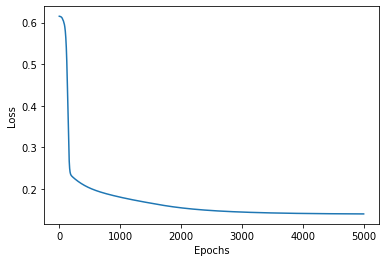

In [14]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

# print("Loss: {}".format(int(loss)))

# Testing 

In [15]:
X_test = dd.read_csv('test.csv', encoding="UTF-8")
X_test = X_test.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)

pId = dd.read_csv('test.csv', encoding="UTF-8", usecols=['PassengerId'])

X_test['Sex'] = X_test['Sex'].replace(['male', 'female'],[1,2])
X_test['Embarked'] = X_test['Embarked'].replace(['S', 'C', 'Q'],[1,2,3])


In [16]:
X_test['Age'].fillna(X_test['Age'].mode()[0], inplace=True)  # replace NaN with average age
X_test['Embarked'].fillna(X_test['Embarked'].mode()[0], inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mode()[0], inplace=True)

X_test.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [17]:
X_test.head()
# len(X_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,2,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,2,22.0,1,1,12.2875,1


In [18]:
X_test = torch.Tensor(X_test.values)
pId = torch.Tensor(pId.values)


In [19]:
predictions = [['PassengerId', 'Survived']]

i = 0
for x in X_test:
#     print(x)
    pred = model.predict(x)
    predictions.append([int(pId[i]), pred])
    i += 1

predictions

[['PassengerId', 'Survived'],
 [892, 0],
 [893, 0],
 [894, 0],
 [895, 0],
 [896, 1],
 [897, 0],
 [898, 1],
 [899, 0],
 [900, 1],
 [901, 0],
 [902, 0],
 [903, 0],
 [904, 1],
 [905, 0],
 [906, 1],
 [907, 1],
 [908, 0],
 [909, 0],
 [910, 0],
 [911, 0],
 [912, 0],
 [913, 0],
 [914, 1],
 [915, 1],
 [916, 1],
 [917, 0],
 [918, 1],
 [919, 0],
 [920, 0],
 [921, 0],
 [922, 0],
 [923, 0],
 [924, 0],
 [925, 1],
 [926, 0],
 [927, 0],
 [928, 1],
 [929, 1],
 [930, 0],
 [931, 0],
 [932, 0],
 [933, 1],
 [934, 0],
 [935, 1],
 [936, 1],
 [937, 0],
 [938, 0],
 [939, 0],
 [940, 1],
 [941, 0],
 [942, 0],
 [943, 0],
 [944, 1],
 [945, 1],
 [946, 0],
 [947, 0],
 [948, 0],
 [949, 0],
 [950, 0],
 [951, 1],
 [952, 0],
 [953, 0],
 [954, 0],
 [955, 1],
 [956, 1],
 [957, 1],
 [958, 1],
 [959, 0],
 [960, 1],
 [961, 1],
 [962, 1],
 [963, 0],
 [964, 1],
 [965, 1],
 [966, 1],
 [967, 1],
 [968, 0],
 [969, 1],
 [970, 0],
 [971, 1],
 [972, 0],
 [973, 0],
 [974, 0],
 [975, 0],
 [976, 0],
 [977, 0],
 [978, 1],
 [979, 1],
 [

In [20]:
import csv

with open('submission.csv', 'w') as submissionFile:
    writer = csv.writer(submissionFile)
    writer.writerows(predictions)